<a href="https://colab.research.google.com/github/ponomarevaJV/PDA_SOL/blob/main/%D0%9B%D0%915ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт модулей, не связанныех с PySpark.
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# Это помогает автоматически распечатывать элементы без явного использования «печати».
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install pyspark

In [ ]:
# Импорт модулей, связанных с PySpark.
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct, count, sum, min, max
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Инициализировать сеанс Spark.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
filename_data = '/content/drive/MyDrive/2 семестр /Корпоративные платформы для хранения и анализа больших данных /5лб/brewery_data_complete_extended.csv' # Загрузите данные в текущий каталог Colab.

df = spark.read.option("header", True).csv(filename_data)
print('Data frame type: ' + str(type(df)))

Data frame type: <class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
print('Обзор данных')
df.printSchema()
print('Обзор столбцов')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Обзор данных
root
 |-- Batch_ID: string (nullable = true)
 |-- Brew_Date: string (nullable = true)
 |-- Beer_Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Fermentation_Time: string (nullable = true)
 |-- Temperature: string (nullable = true)
 |-- pH_Level: string (nullable = true)
 |-- Gravity: string (nullable = true)
 |-- Alcohol_Content: string (nullable = true)
 |-- Bitterness: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Ingredient_Ratio: string (nullable = true)
 |-- Volume_Produced: string (nullable = true)
 |-- Total_Sales: string (nullable = true)
 |-- Quality_Score: string (nullable = true)
 |-- Brewhouse_Efficiency: string (nullable = true)
 |-- Loss_During_Brewing: string (nullable = true)
 |-- Loss_During_Fermentation: string (nullable = true)
 |-- Loss_During_Bottling_Kegging: string (nullable = true)

Обзор столбцов


,Column Name,Data type
0,Batch_ID,string
1,Brew_Date,string
2,Beer_Style,string
3,SKU,string
4,Location,string
5,Fermentation_Time,string
6,Temperature,string
7,pH_Level,string
8,Gravity,string
9,Alcohol_Content,string


In [ ]:
print(f'Общее количество {df.count()} строк, печатаем несколько первых строк:')
df.limit(2).toPandas()

Общее количество 10000000 строк, печатаем несколько первых строк:


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204250857069873,5.2898454476095615,1.0395041267301979,5.370842159553436,20,5,1:0.32:0.16,4666,2664.7593448382822,8.57701633109399,89.19588216376087,4.1049876591878345,3.2354851724654683,4.663204448186049
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086762947259544,5.275643382756193,1.0598189516987164,5.096053082797625,36,14,1:0.39:0.24,832,9758.801062471319,7.420540752553908,72.4809153900275,2.6765280953921122,4.2461292104108574,2.04435836917023


In [ ]:
print('Обзор столбцов')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Обзор столбцов


,Column Name,Data type
0,Batch_ID,string
1,Brew_Date,string
2,Beer_Style,string
3,SKU,string
4,Location,string
5,Fermentation_Time,string
6,Temperature,string
7,pH_Level,string
8,Gravity,string
9,Alcohol_Content,string


In [ ]:
string_columns = ['Batch_ID', 'Brew_Date','Beer_Style','SKU','Location','Location','Temperature	','pH_Level','Gravity','Alcohol_Content','Alcohol_Content','Color	','Ingredient_Ratio','Quality_Score	']
numeric_columns = ['Volume_Produced','Total_Sales','Brewhouse_Efficiency', 'Brewhouse_Efficiency','Brewhouse_Efficiency	','	Loss_During_Bottling_Kegging']
array_columns = []
missing_values = {}
for index, column in enumerate(df.columns):
    if column in string_columns:    # проверить столбцы строк со значениями None и Null
#         missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
          missing_values.update({column: missing_count})
#      missing_count = df.filter(col(column).eqNullSafe(None) | col(column).isNull()).count()
#        missing_values.update({column:missing_count})
    if column in numeric_columns:  # check zeroes, None, NaN
 #       missing_count = df.where(col(column).isin([None,np.nan])).count()
        missing_values.update({column:missing_count})
    if column in array_columns:  # check zeros and NaN
        missing_count = df.filter(array_contains(df[column], 0) | array_contains(df[column], np.nan)).count()
        missing_values.update({column:missing_count})
missing_df = pd.DataFrame.from_dict([missing_values])
missing_df

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,pH_Level,Gravity,Alcohol_Content,Ingredient_Ratio,Volume_Produced,Total_Sales,Brewhouse_Efficiency
0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Преобразование столбца метки времени в Datetime.Datetime, чтобы позже использовать его для функции .withColumn.
def to_datetime(t):
    return datetime.strptime(t, "%Y/%m/%d %H:%M")

# Регистрация вспомогательной функции to_time в структуре UDF pyspark
udf_to_datetime = udf(to_datetime, DateType())

In [ ]:
# Преобразование столбца метки времени в Datetime.Datetime, чтобы позже использовать его для функции .withColumn.
def to_day(t):
    return datetime.strptime(t, "%Y/%m/%d %H:%M").day

# Регистрация вспомогательной функции to_time в структуре UDF pyspark
udf_to_day = udf(to_day, IntegerType())

In [ ]:
df = df.withColumn('Brew_Date', udf_to_day(df['Batch_ID']))
print('Обзор столбцов')
pd.DataFrame(df.dtypes, columns = ['Brew_Date','Data type'])

Обзор столбцов


,Brew_Date,Data type
0,Batch_ID,string
1,Brew_Date,int
2,Beer_Style,string
3,SKU,string
4,Location,string
5,Fermentation_Time,string
6,Temperature,string
7,pH_Level,string
8,Gravity,string
9,Alcohol_Content,string


In [ ]:
df = df.withColumn("Total_Sales",	df["Total_Sales"].cast("float"))

In [ ]:
df.dtypes

[('Batch_ID', 'string'),
 ('Brew_Date', 'int'),
 ('Beer_Style', 'string'),
 ('SKU', 'string'),
 ('Location', 'string'),
 ('Fermentation_Time', 'string'),
 ('Temperature', 'string'),
 ('pH_Level', 'string'),
 ('Gravity', 'string'),
 ('Alcohol_Content', 'string'),
 ('Bitterness', 'string'),
 ('Color', 'string'),
 ('Ingredient_Ratio', 'string'),
 ('Volume_Produced', 'string'),
 ('Total_Sales', 'float'),
 ('Quality_Score', 'string'),
 ('Brewhouse_Efficiency', 'string'),
 ('Loss_During_Brewing', 'string'),
 ('Loss_During_Fermentation', 'string'),
 ('Loss_During_Bottling_Kegging', 'string')]

In [ ]:
df = df.withColumn("Batch_ID", col("Batch_ID").cast(IntegerType()))

In [ ]:
ST = df \
.select(df.Brew_Date, df.Batch_ID)\
.filter(df['Beer_Style'] == 1) \
.distinct()\
.groupby(df.Brew_Date)\
.agg(count('Batch_ID')).alias('cnt').toPandas()

In [ ]:
ST= ST.set_index('').sort_index()
ST

,count(Batch_ID)
Brew_Date,


[Text(0.5, 1.0, 'Количество продаж'),
 Text(0.5, 0, 'День'),
 Text(0, 0.5, 'количество операций')]

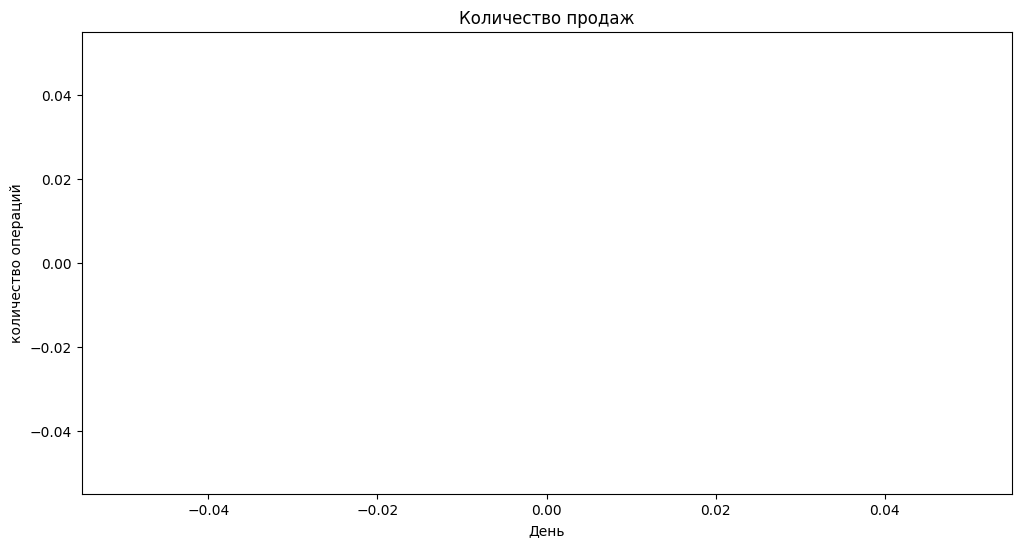

In [ ]:
ax= ST.plot(figsize = (12,6),legend= None)
ax.set(title = 'Количество продаж', xlabel = 'День', ylabel='количество операций')